# Linear Programming Problems Formulation Case Study with Implementation

### Linear Programming (LP) is a mathematical method used to determine the best possible outcome or solution from a given set of parameters or list of requirements. It's widely used in various fields for optimizing processes, resources, and operations. The objective of LP is to maximize or minimize a linear objective function, subject to a set of linear constraints.

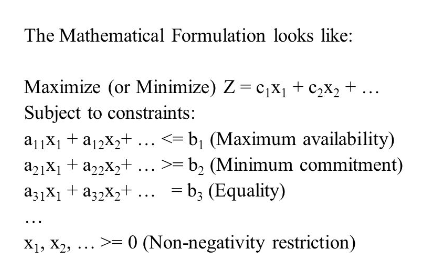

In [1]:
import numpy as np
from scipy.optimize import linprog

## 1. Maximization or Minimization Problem
### Case Study: Profit Maximization in a Factory

Scenario: A factory produces two products, A and B. The profit per unit of product A is $40, and the profit per unit of product B is $30. The factory has 100 hours of labor and 180 units of raw material available. Product A requires 2 hours of labor and 3 units of raw material per unit, while product B requires 1 hour of labor and 4 units of raw material per unit. The goal is to determine how many units of each product to produce to maximize profit.

#### Decision Variables:

𝑥
1
​
 : Number of units of product A to produce.
 
 
𝑥
2
​
 : Number of units of product B to produce.
 
 
#### Objective Function:

Maximize profit 
𝑍
=
40
𝑥
1
+
30
𝑥
2
Z=40x 
1
​
 +30x 
2
​
 
 
 
#### Constraints:

Labor: 
2
𝑥
1
+
𝑥
2
≤
100
2x 
1
​
 +x 
2
​
 ≤100
 
 
#### Raw Material: 
3
𝑥
1
+
4
𝑥
2
≤
180
3x 
1
​
 +4x 
2
​
 ≤180
 
 
#### Non-negativity: 
𝑥
1
≥
0
x 
1
​
 ≥0, 
𝑥
2
≥
0
x 
2
​
 ≥0.

In [2]:
# Coefficients of the objective function
c = [-40, -30]  # Negative because linprog does minimization

# Coefficients of the inequality constraints
A = [[2, 1], [3, 4]]
b = [100, 180]

# Bounds for decision variables
x0_bounds = (0, None)
x1_bounds = (0, None)

# Solve the linear programming problem
result = linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds], method='simplex')

print(f'Optimal number of units of product A: {result.x[0]}')
print(f'Optimal number of units of product B: {result.x[1]}')
print(f'Maximized profit: {-result.fun}')


Optimal number of units of product A: 44.0
Optimal number of units of product B: 12.0
Maximized profit: 2120.0


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16648\3944867920.py:13: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  result = linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds], method='simplex')


## 2. Trim Loss Problem
### Case Study: Minimizing Trim Loss in Paper Cutting

Scenario: A paper mill needs to cut rolls of paper into smaller rolls of widths 3 meters and 5 meters from larger rolls of 20 meters. The goal is to minimize the trim loss (waste) while fulfilling an order for at least 100 rolls of 3 meters and 80 rolls of 5 meters.

#### Decision Variables:

𝑥
1
​
 : Number of large rolls cut into 3-meter rolls.
 
𝑥
2
​
 : Number of large rolls cut into 5-meter rolls.
 
 
#### Objective Function:

Minimize trim loss 
𝑍
=
20
−
3
𝑥
1
−
5
𝑥
2
Z=20−3x 
1
​
 −5x 
2
​
 
 
#### Constraints:

Order for 3-meter rolls: 
3
𝑥
1
≥
100
3x 
1
​
 ≥100
 
Order for 5-meter rolls: 
5
𝑥
2
≥
80
5x 
2
​
 ≥80
 
#### Non-negativity: 
𝑥
1
≥
0
x 
1
​
 ≥0, 
𝑥
2
≥
0
x 
2
​
 ≥0.

In [3]:
# Coefficients of the objective function
c = [3, 5]

# Coefficients of the inequality constraints
A = [[-3, 0], [0, -5]]
b = [-100, -80]

# Bounds for decision variables
x0_bounds = (0, None)
x1_bounds = (0, None)

# Solve the linear programming problem
result = linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds], method='simplex')

print(f'Optimal number of large rolls cut into 3-meter rolls: {result.x[0]}')
print(f'Optimal number of large rolls cut into 5-meter rolls: {result.x[1]}')
print(f'Minimized trim loss: {20 - 3*result.x[0] - 5*result.x[1]}')


Optimal number of large rolls cut into 3-meter rolls: 33.333333333333336
Optimal number of large rolls cut into 5-meter rolls: 16.0
Minimized trim loss: -160.0


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16648\2504825354.py:13: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  result = linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds], method='simplex')


## 3. Scheduling Problem
### Case Study: Job Scheduling to Minimize Completion Time

Scenario: A company needs to schedule 3 jobs on 2 machines. Each job requires different processing times on each machine. The goal is to minimize the total completion time.

#### Decision Variables:

𝑥
𝑖
𝑗
​
 : Binary variable that indicates 
 
 if job 
𝑖

i is scheduled on machine 
𝑗


#### Objective Function:

Minimize total completion time.

#### Constraints:

Each job must be assigned to one and only one machine.

Machine capacity constraints.

In [4]:
# Coefficients of the objective function (flattened for the linear solver)
c = [2, 3, 1, 4, 5, 3]  # Example processing times

# Coefficients of the equality constraints
A_eq = np.zeros((3, 6))
b_eq = np.ones(3)

# Each job must be assigned to one and only one machine
for i in range(3):
    A_eq[i, i*2:(i+1)*2] = 1

# Bounds for decision variables (binary)
bounds = [(0, 1) for _ in range(6)]

# Solve the linear programming problem
result = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='simplex')

print(f'Job assignment: {result.x.reshape((3, 2))}')
print(f'Minimized completion time: {result.fun}')


Job assignment: [[1. 0.]
 [1. 0.]
 [0. 1.]]
Minimized completion time: 6.0


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16648\3606195933.py:16: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  result = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='simplex')


## 4. Transportation Problem
### Case Study: Minimizing Transportation Cost

Scenario: A company needs to transport goods from 2 warehouses to 3 retail stores. The cost of transportation from each warehouse to each store is known. The goal is to minimize the total transportation cost while meeting the demand at each store and not exceeding the supply at each warehouse.

#### Decision Variables:

𝑥
𝑖
𝑗
​
 : Number of units transported from warehouse 𝑖
i to store 𝑗

#### Objective Function:

Minimize total transportation cost 
𝑍
=
∑
𝑐
𝑖
𝑗
𝑥
𝑖
𝑗
Z=∑c 
ij
​
 x 
ij
​
 
#### Constraints:

Supply constraints for each warehouse.
Demand constraints for each store.

#### Non-negativity: 
𝑥
𝑖
𝑗
≥
0



In [5]:
# Coefficients of the objective function
c = [4, 3, 5, 2, 3, 4, 3, 2, 3]

# Coefficients of the inequality constraints
A = [[1, 1, 0, 1, 1, 0, 0, 0, 0],
     [0, 0, 1, 0, 1, 1, 1, 0, 0],
     [0, 0, 0, 0, 0, 0, 1, 1, 1]]

b = [70, 50, 50]

# Bounds for decision variables
x_bounds = [(0, None) for _ in range(9)]

# Solve the linear programming problem
result = linprog(c, A_eq=A, b_eq=b, bounds=x_bounds, method='simplex')

print(f'Units transported from warehouses to stores: {result.x.reshape((3, 3))}')
print(f'Minimized transportation cost: {result.fun}')


Units transported from warehouses to stores: [[ 0.  0.  0.]
 [70.  0.  0.]
 [50.  0.  0.]]
Minimized transportation cost: 290.0


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16648\1380539352.py:15: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  result = linprog(c, A_eq=A, b_eq=b, bounds=x_bounds, method='simplex')
